# K-Nearest Neighbors Regressor

### Introducing the database

The database for this example is generated randomly. Generating datasets is an important skill to have. This is the best way to explore the algorithms themelves without having to worry about encoding, standardizing, dealing with outliers and all sorts of preprocessing that comes with a real-world dataset. Another advantage of randomly generated datasets is that you have full control over the data. You are free to choose the number of features, the number of classes, the way the points are distributed, everything really! 

I wish you to have lots of fun with the exercise and keep experimenting!

### Importing the necessary libraries

In [1]:
# Will help us generate the regression
from sklearn.datasets import make_regression
# Will help us create the KNN regression model
from sklearn.neighbors import KNeighborsRegressor

# Will help us visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

### Generating the database

In [2]:
# Create a linear regression with 10 samples and a single feature.
# Introduce some noise in the data
# Set a random state, so that each run produces the same regression
inputs, target = make_regression(n_samples = 10, 
                                 n_features = 1, 
                                 noise = 15,
                                 random_state = 365)

In [3]:
# Since the dataset is randomly generated, we are free to modify it at our will.
# Here, I divide the target values just to make the numbers in the dataset smaller. 
# Note, this is not something you would do with a real dataset!
target = target/40

### Plotting the database

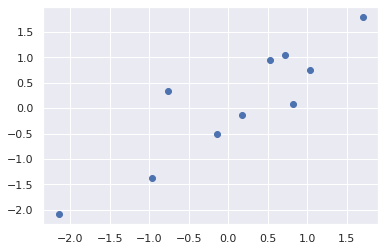

In [4]:
# Set the seaborn visualization
sns.set()

# Plot the dataset
plt.scatter(inputs, target);

### Creating the model

In [5]:
# Create a KNN regressior with a specified K-value
reg_knn = KNeighborsRegressor(n_neighbors = 3)

# Fit the model to the data
reg_knn.fit(inputs, target)

KNeighborsRegressor(n_neighbors=3)

### Predicting a sample

In [6]:
# Set an x-value to a sample whose y-value we aim to predict
x_pred = -0.5

# Use the fitted model to predict the y-value of the sample
y_pred = reg_knn.predict([[x_pred]])

# Display the predicted value
y_pred

array([-0.51650189])

In [7]:
# Store the distance to the three nearest neighbors as well as their indices in the dataset
neighbors = reg_knn.kneighbors([[x_pred]])

# Display the distanes and the indices
neighbors

(array([[0.26014535, 0.35632097, 0.46645194]]), array([[8, 3, 0]]))

### Visualizing the neighbors

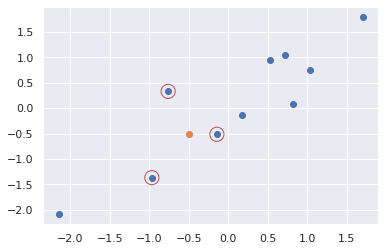

In [8]:
# Set the seaborn visualization
sns.set()

# Plot the targets versus the inputs
plt.scatter(inputs, target)

# Plot the sample point whose y-value we predicted
plt.scatter(x_pred, y_pred)

# Create two arrays where the x- and y-values of the nearest neighbors will be stored
plot_x_train = []
plot_y_train = []

# Use the indices of the nearest neighbors to fetch their x- and y-values
for i in neighbors[1]:
    plot_x_train.append(inputs[i])
    plot_y_train.append(target[i])

# Encircle the nearest neighbors
plt.scatter(plot_x_train, 
            plot_y_train, 
            s=200, facecolors='none', edgecolors='r');

### Calculating the predicted value

In [9]:
# Display the y-values of the neighbors together with the predicted y-value

# target[8], y_pred
# target[8], target[3], y_pred
target[8], target[3], target[0], y_pred

(0.3288886919385298,
 -0.5134152746794666,
 -1.3649790770347563,
 array([-0.51650189]))

In [10]:
# Find the arithmetic mean of the y-values of the nearest neighbors
(target[8] + target[3] + target[0])/3

-0.5165018865918977